3. How does the portrayal of historical events in movies vary based on the country of production?
This question could analyze narrative and thematic differences in films about the same historical events, revealing how cultural perspectives and national histories influence storytelling and representation in movies from different countries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import csv
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
#downloading nltk packages
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('vader_lexicon')

# Set of English stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fatum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\fatum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\fatum\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\fatum\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\fatum\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already

Adding the plot summaries

Cleaning: removing punctuation, removing stop words

In [4]:
df = pd.read_csv('data/movies_with_summaries.csv')
df.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
0,975900,tt0228333,Ghosts of Mars,Ghosts of Mars,2001-08-24,2001,"['Thriller', 'Science Fiction', 'Horror', 'Adv...","['Action,Horror,Sci-Fi']",4.9,58872,14010832.0,98.0,['English Language'],['United States of America'],"Set in the second half of the 22nd century, th..."
1,261236,tt0083949,A Woman in Flames,Die flambierte Frau,1983,1983,['Drama'],['Drama'],5.9,648,NaN,106.0,['German Language'],['Germany'],"Eva, an upper class housewife, becomes frustra..."
2,171005,tt0097499,Henry V,Henry V,1989-11-08,1989,"['Costume drama', 'War film', 'Epic', 'Period ...","['Biography,Drama,History']",7.5,32088,10161099.0,137.0,['English Language'],['United Kingdom'],{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
3,77856,tt0058331,Mary Poppins,Mary Poppins,1964-08-27,1964,"['ChildrensFamily', 'Musical', 'Fantasy', 'Com...","['Comedy,Family,Fantasy']",7.8,189202,102272727.0,139.0,['English Language'],['United States of America'],The film opens with Mary Poppins perched in a...
4,32456683,tt0061637,Die Fahne von Kriwoj Rog,Die Fahne von Kriwoj Rog,1967,1967,[],['Drama'],7.7,24,NaN,108.0,['German Language'],['German Democratic Republic'],"Otto Brosowski, a communist miner, writes to t..."


In [5]:
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    #text=cleaned_text.lower()
    return text

In [6]:
df['cleaned_summary'] = df['summary'].apply(clean_text)

### Separating per Event
In a first try, we will only filter out three conflicts: WWII, Cold War and Vietnam war. Later on, we will add more conflicts, and improve selection by adding more specific words to each conflict

In [7]:
df_war_movies = df[df['Genres'].apply(lambda x: bool(set(x) & set("War film")))]

def label_event_regex(summary):
    if re.search(r"(World\sWar\sII|WWII|Hitler|Nazis|Hiroshima|Holocaust)", summary, re.IGNORECASE):
        return "World War II"
    elif re.search(r"(Vietnam\sWar|Viet\sCong|Saigon)", summary, re.IGNORECASE):
        return "Vietnam War"
    elif re.search(r"(Cold\sWar|Soviet\sUnion|communism|nuclear)", summary, re.IGNORECASE):
        return "Cold War"
    else:
        return "Other"

df_war_movies['event'] = df_war_movies['summary'].apply(label_event_regex)

C:\Users\fatum\AppData\Local\Temp\ipykernel_23528\1008644272.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_war_movies['event'] = df_war_movies['summary'].apply(label_event_regex)


In [8]:
df_war_movies[df_war_movies['event'] == "Cold War"]

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary,cleaned_summary,event
0,975900,tt0228333,Ghosts of Mars,Ghosts of Mars,2001-08-24,2001,"['Thriller', 'Science Fiction', 'Horror', 'Adv...","['Action,Horror,Sci-Fi']",4.9,58872,14010832.0,98.0,['English Language'],['United States of America'],"Set in the second half of the 22nd century, th...","Set in the second half of the 22nd century, th...",Cold War
28,5664529,tt0063787,Vixen!,Vixen!,1968,1968,"['Softcore Porn', 'Sexploitation']",['Drama'],5.6,3185,NaN,70.0,['English Language'],['United States of America'],"In the heart of the Canadian wilderness, sultr...","In the heart of the Canadian wilderness, sultr...",Cold War
32,4300418,tt0347167,The Hero: Love Story of a Spy,The Hero: Love Story of a Spy,2003-04-11,2003,"['Thriller', 'Action Thrillers', 'Adventure', ...","['Action,Adventure,Drama']",5.5,2659,NaN,182.0,['Hindi Language'],['India'],Arun Sharma is a spy working for RAW . He set...,Arun Sharma is a spy working for RAW . He set...,Cold War
35,2154704,tt0090836,Choke Canyon,Choke Canyon,1986-05-02,1986,"['Thriller', 'Action Thrillers', 'Science Fict...","['Action,Sci-Fi']",5.2,334,NaN,94.0,['English Language'],['United States of America'],Dr. David Lowell's research is carried out in...,Dr. David Lowell's research is carried out in...,Cold War
51,1305819,tt0087015,C.H.U.D.,C.H.U.D.,1984-08-31,1984,"['Monster movie', 'Natural horror films', 'Sci...","['Horror,Sci-Fi']",5.6,14382,4650000.0,96.0,['English Language'],['United States of America'],The film opens with a woman walking her dog do...,The film opens with a woman walking her dog do...,Cold War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28957,20026897,tt0015167,The Extraordinary Adventures of Mr. West in th...,Neobychainye priklyucheniya mistera Vesta v st...,1924-04-27,1924,"['Silent film', 'Comedy']","['Comedy,Fantasy,Romance']",6.4,1141,NaN,86.0,"['Silent film', 'Russian Language', 'English L...",['Soviet Union'],The film is a broad satire of American ignoran...,The film is a broad satire of American ignoran...,Cold War
29007,9424050,tt0061553,The Day the Fish Came Out,The Day the Fish Came Out,1967-10-02,1967,"['Science Fiction', 'Comedydrama', 'Comedy']","['Comedy,Sci-Fi']",5.3,684,NaN,109.0,['English Language'],"['United States of America', 'United Kingdom',...",The film was inspired by an actual incident; a...,The film was inspired by an actual incident; a...,Cold War
29032,20887118,tt1286130,Battlestar Galactica: The Plan,The Plan,2009,2009,"['Science Fiction', 'SciFi Adventure']","['Action,Adventure,Drama']",7.0,21490,NaN,112.0,['English Language'],['United States of America'],{{long plot}} The opening scenes of The Plan o...,{{long plot}} The opening scenes of The Plan o...,Cold War
29045,34014813,tt1273813,A Short Stay in Switzerland,A Short Stay in Switzerland,2009-01-25,2009,"['Biographical film', 'Drama']","['Biography,Drama']",7.5,607,NaN,90.0,[],[],The movie is based on the true story of Dr. An...,The movie is based on the true story of Dr. An...,Cold War


In [9]:
wwii_movies = df_war_movies[df_war_movies['event'] == "World War II"]
cold_war_movies = df_war_movies[df_war_movies['event'] == "Cold War"]
vietnam_war_movies = df_war_movies[df_war_movies['event'] == "Vietnam War"]
test_sample=wwii_movies.sample(100)

## Sentiment Analysis
In a first step, we perform overall sentiment analysis on the dataset to highlight differences in portrayal of WWII

In [10]:
synopses=test_sample["cleaned_summary"].tolist()

In [11]:
processed_docs = []
for synopsis in synopses:
    tokens = word_tokenize(synopsis.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    processed_docs.append(filtered_tokens)

In [12]:
analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []
for tokens in processed_docs:
    text = ' '.join(tokens)
    score = analyzer.polarity_scores(text)
    sentiment_scores.append(score)

sentiment_df = pd.DataFrame(sentiment_scores)


test_sample = test_sample.reset_index(drop=True
                                     )


test_sample = pd.concat([test_sample, sentiment_df], axis=1)


print(test_sample[['cleaned_summary', 'neg', 'neu', 'pos', 'compound']])

                                      cleaned_summary    neg    neu    pos  \
0   1940 - Operation Dynamo has just taken place. ...  0.150  0.766  0.084   
1   Grace Stewart  is a Catholic mother who lives ...  0.183  0.632  0.185   
2    In January 1942, Adolf Hitler appoints Fedor ...  0.136  0.781  0.083   
3   One after another of a company of carrier pige...  0.193  0.683  0.124   
4   The action takes place during World War II and...  0.188  0.687  0.125   
..                                                ...    ...    ...    ...   
95  It shows three friends just before WWII in Dub...  0.227  0.691  0.082   
96  Claude  is an 8-year-old Jewish boy living in ...  0.154  0.626  0.221   
97  The opening of this play is "This is a simple-...  0.219  0.552  0.228   
98  The film is set in 1957–1958 in Coburg, in pos...  0.095  0.748  0.157   
99  An earthquake leaves the California coastline ...  0.360  0.590  0.049   

    compound  
0    -0.9758  
1    -0.7096  
2    -0.4767  
3  

#### displaying results

In [13]:
sentiment_analysis_viz = test_sample[['Countries', 'neg', 'pos', 'neu']]
sentiment_analysis_viz['Countries'] = sentiment_analysis_viz['Countries'].apply(ast.literal_eval)
neg_by_countries = pd.DataFrame(sentiment_analysis_viz.explode('Countries').groupby('Countries')['neg'].mean()).reset_index()
pos_by_countries = pd.DataFrame(sentiment_analysis_viz.explode('Countries').groupby('Countries')['pos'].mean()).reset_index()
neu_by_countries = pd.DataFrame(sentiment_analysis_viz.explode('Countries').groupby('Countries')['neu'].mean()).reset_index()
neg_by_countries

C:\Users\fatum\AppData\Local\Temp\ipykernel_23528\3370690982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_analysis_viz['Countries'] = sentiment_analysis_viz['Countries'].apply(ast.literal_eval)


,Countries,neg
0,Australia,0.155000
1,Austria,0.221500
2,Canada,0.152500
3,China,0.155000
4,Czech Republic,0.216000
5,Czechoslovakia,0.182667
6,Denmark,0.222000
7,France,0.211900
8,German Democratic Republic,0.136000
9,Germany,0.207545


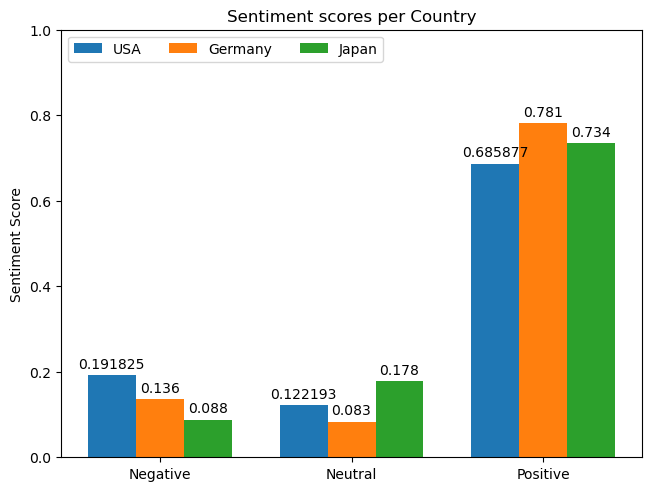

In [14]:
data_usa = [neg_by_countries.loc[neg_by_countries['Countries'] == 'United States of America']['neg'], pos_by_countries.loc[pos_by_countries['Countries'] == 'United States of America']['pos'], neu_by_countries.loc[neu_by_countries['Countries'] == 'United States of America']['neu']]
data_japan = [neg_by_countries.loc[neg_by_countries['Countries'] == 'Japan']['neg'], pos_by_countries.loc[pos_by_countries['Countries'] == 'Japan']['pos'], neu_by_countries.loc[neu_by_countries['Countries'] == 'Japan']['neu']]
data_germany = [neg_by_countries.loc[neg_by_countries['Countries'] == 'German Democratic Republic']['neg'], pos_by_countries.loc[pos_by_countries['Countries'] == 'German Democratic Republic']['pos'], neu_by_countries.loc[neu_by_countries['Countries'] == 'German Democratic Republic']['neu']]

score = ("Negative", "Neutral", "Positive")
sentiment_means = {
    'USA': (data_usa[0].values.item(), data_usa[1].values.item(), data_usa[2].values.item()),
    'Germany': (data_germany[0].values.item(), data_germany[1].values.item(), data_germany[2].values.item()),
    'Japan': (data_japan[0].values.item(), data_japan[1].values.item(), data_japan[2].values.item()),
}

x = np.arange(len(score))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in sentiment_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment scores per Country')
ax.set_xticks(x + width, score)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

### 

### Named Entity recognition

In [15]:
wwii_movies['tokenized_summaries'] = wwii_movies['cleaned_summary'].apply(word_tokenize)

C:\Users\fatum\AppData\Local\Temp\ipykernel_23528\2717461006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wwii_movies['tokenized_summaries'] = wwii_movies['cleaned_summary'].apply(word_tokenize)


In [18]:
test_sample = wwii_movies.sample(100)
stop_words = set(stopwords.words('english'))
tokens_summ = test_sample['tokenized_summaries'].to_list()
lemmatizer = WordNetLemmatizer()
NER_tags = []
for summary in tokens_summ:
    filtered_token = [word for word in summary if word not in stop_words]
    lemmatized_tokens = ([lemmatizer.lemmatize(token) for token in filtered_token])
    pos_tags = nltk.pos_tag(lemmatized_tokens)
    ner_tags = ne_chunk(pos_tags)
    NER_tags.append(ner_tags)

In [19]:
NER_tags[0]

ModuleNotFoundError: No module named 'svgling'

Tree('S', [('Relatively', 'RB'), ('void', 'JJ'), ('plot', 'NN'), (',', ','), ('short', 'JJ'), ('depicts', 'NNS'), ('Bosko', 'NNP'), ('hosting', 'VBG'), ('movie', 'NN'), ('show', 'NN'), (',', ','), ('playing', 'VBG'), ('``', '``'), ('Furtilizer', 'NNP'), ("''", "''"), ('organ', 'NN'), (',', ','), ('leading', 'VBG'), ('audience', 'NN'), ('song', 'NN'), ('``', '``'), ('We', 'PRP'), ("'re", 'VBP'), Tree('PERSON', [('Money', 'NNP')]), ("''", "''"), ('.', '.'), ('He', 'PRP'), ('go', 'VB'), ('introduce', 'JJ'), ('mock', 'NN'), ('newsreel', 'NN'), ('feature', 'NN'), ('caricature', 'NN'), Tree('ORGANIZATION', [('Marx', 'NNP'), ('Brothers', 'NNPS')]), ('chasing', 'VBG'), ('dog', 'NN'), ('dog', 'NN'), ('race', 'NN'), (',', ','), ('well', 'RB'), ('sequence', 'NN'), ('depicting', 'VBG'), Tree('PERSON', [('Adolf', 'NNP'), ('Hitler', 'NNP')]), ('pursuing', 'VBG'), Tree('PERSON', [('Jimmy', 'NNP'), ('Durante', 'NNP')]), ('meat', 'NN'), ('cleaver', 'NN'), ('hand', 'NN'), (',', ','), ('possibly', 'RB'),

In [ ]:
def extracting_entities(tags):
    entities = []
    for i, tree in enumerate(NER_tags):
        for subtree in tree.subtrees():
            subentities = []
            for subsubtree in subtree.subtrees():
                if (subsubtree.label() == 'PERSON')|(subsubtree.label() == 'ORGANIZATION'):
                    subentities.append(" ".join(word for word, tag in subsubtree.leaves()))
            entities.append(subentities)
    return entities


In [23]:
def extracting_entities(tree):
    entities = []
    for subtree in tree.subtrees():
        if (subtree.label() == 'PERSON')|(subtree.label() == 'ORGANIZATION'):
            entities.append(" ".join(word for word, tag in subtree.leaves()))
    return entities



entities = []
for i, tree in enumerate(NER_tags):
    entities.append(extracting_entities(tree))
    

In [28]:
test_sample['Entities'] = entities
test_sample.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary,cleaned_summary,event,tokenized_summaries,Entities
22234,13205924,tt0023836,Bosko's Picture Show,Bosko's Picture Show,1933-08-26,1933,"['Short Film', 'Comedy', 'Animation']","['Animation,Comedy,Family']",6.1,289,NaN,6.0,['English Language'],['United States of America'],"Relatively void of plot, the short depicts Bos...","Relatively void of plot, the short depicts Bos...",World War II,"[Relatively, void, of, plot, ,, the, short, de...","[Money, Marx Brothers, Adolf Hitler, Jimmy Dur..."
26384,4836948,tt0035093,Mrs. Miniver,Mrs. Miniver,1942-06-04,1942,"['Propaganda film', 'Family Drama', 'Drama', '...","['Drama,Romance,War']",7.6,19829,8878000.0,134.0,['English Language'],"['United States of America', 'United Kingdom']",Mrs. Kay Miniver and her family live a comfor...,Mrs. Kay Miniver and her family live a comfor...,World War II,"[Mrs., Kay, Miniver, and, her, family, live, a...","[Toby Judy, Vin, Gladys, Ada, Vin, Carol Beldo..."
8573,8609643,tt0078341,Summer of My German Soldier,Summer of My German Soldier,1978,1978,"['Romance Film', 'Drama']","['Drama,Romance,War']",7.7,477,NaN,100.0,['English Language'],['United States of America'],13 year old Patty Bergen lives in Jenkinsville...,13 year old Patty Bergen lives in Jenkinsville...,World War II,"[13, year, old, Patty, Bergen, lives, in, Jenk...","[Patty Bergen, Jenkinsville, Patty, Patty, Pat..."
20857,27515609,tt0173015,Monday or Tuesday,Ponedjeljak ili utorak,1966,1966,['Drama'],['Drama'],7.2,165,NaN,84.0,['Serbian language'],"['Yugoslavia', 'Socialist Federal Republic of ...",The film follows a day in the life of a divorc...,The film follows a day in the life of a divorc...,World War II,"[The, film, follows, a, day, in, the, life, of...","[Marko Požgaj, Mundane, Požgaj, Rajka]"
474,62688,tt0032484,Foreign Correspondent,Foreign Correspondent,1940,1940,"['Thriller', 'Political thriller', 'Spy', 'Bla...","['Action,Romance,Thriller']",7.4,24327,1598435.0,119.0,"['Dutch Language', 'English Language']",['United States of America'],The editor of the New York Globe ([[Harry Dav...,The editor of the New York Globe ([[Harry Dav...,World War II,"[The, editor, of, the, New, York, Globe, (, [,...","[Harry Davenport, Adolf Hitler Nazi Germany, J..."


In [27]:
#### Extracting roles 